Passengerid → 승객 ID

Age → 나이

Fare → 운임 (높을수록 1등급좌석)

Sex → 성별 (0=남자, 1=여자 식으로 변환된 듯)

sibsp → 같이 탑승한 형제/배우자 수

Parch → 같이 탑승한 부모/자녀 수

Pclass → 좌석 등급 (1, 2, 3)

Embarked → 탑승항 (숫자로 변환된 듯: C=0, Q=1, S=2 이런 식일 가능성 높음)

2urvived → 원래 Survived (0=사망, 1=생존)인데 저장할 때 첫 글자가 깨진 것 같음

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.rc('font',family = 'Malgun Gothic')
plt.rc('axes',unicode_minus=False)
# 레티나 설정하면 글씨가 좀 더 선명하게 보이게 해줌
# 폰트 주변이 흐릿하게 보이는걸 방지 
%config InlineBackend.figure_format = 'retina'

### 데이터 확인하기

In [4]:
df = pd.read_csv("titanic.csv",encoding='cp949')
df = df.rename(columns = {"癤풮assengerid":"PassengerId","2urvived":"Survived"})
df.head(3)

,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1


In [17]:
df.isnull().sum()

PassengerId    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [5]:
embarked = {0:"C",1:"Q",2:"S"}
sex = {0:"m",1:"f"}
df["Embarked"] = df["Embarked"].map(embarked)
df["Sex"]=df["Sex"].map(sex)
df.head()

,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,m,1,0,3,S,0
1,2,38.0,71.2833,f,1,0,1,C,1
2,3,26.0,7.9250,f,0,0,3,S,1
3,4,35.0,53.1000,f,1,0,1,S,1
4,5,35.0,8.0500,m,0,0,3,S,0


In [6]:
df["Embarked"].fillna("S",inplace=True)
df.head()

C:\Users\gbk24\AppData\Local\Temp\ipykernel_11636\1035855617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S",inplace=True)


,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,m,1,0,3,S,0
1,2,38.0,71.2833,f,1,0,1,C,1
2,3,26.0,7.9250,f,0,0,3,S,1
3,4,35.0,53.1000,f,1,0,1,S,1
4,5,35.0,8.0500,m,0,0,3,S,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   object 
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1309 non-null   object 
 8   2urvived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 92.2+ KB


20 ~ 30 대가 많음

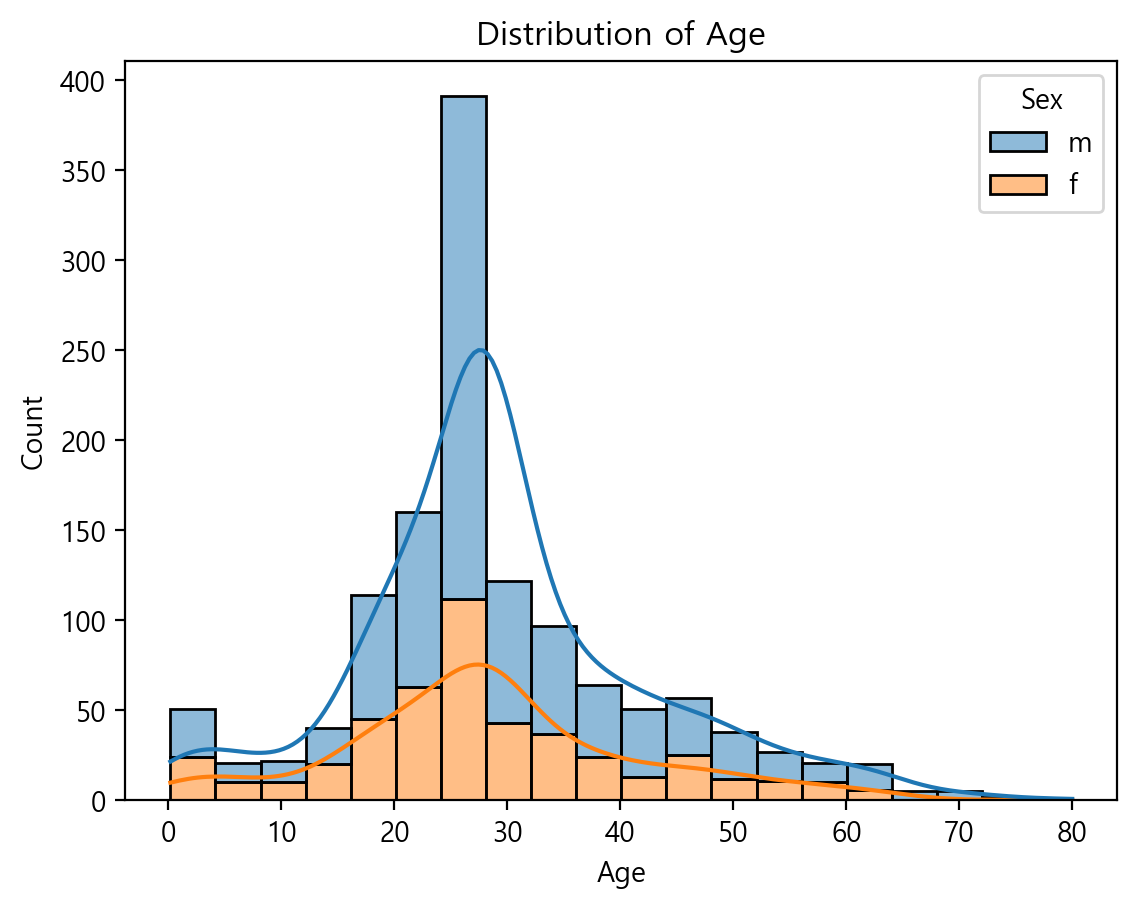

In [47]:
# mutiple="stack"은 hue값을 쌓아서 보여줌 dodge는 옆으로 나란히 보여주는거
sns.histplot(x="Age",hue="Sex",data=df, bins=20, kde=True,multiple="stack")  # kde=True → 밀도곡선 같이 그림
plt.title("Distribution of Age")
plt.show()

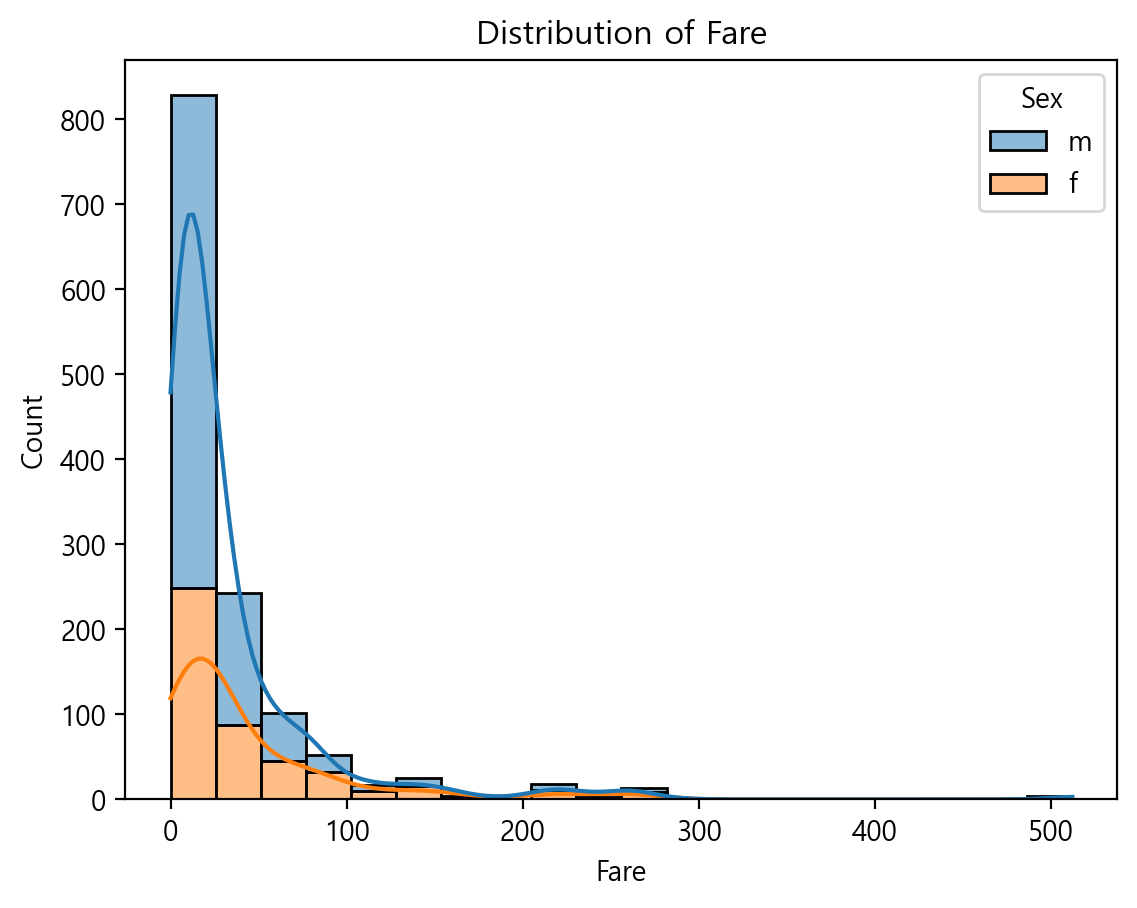

In [49]:
# 저가 운임요금을 내고 탄 승객이 많고 300이후는 없다가 500 요금 고객이 소수 존재함
sns.histplot(x="Fare",hue="Sex",data=df,bins=20,kde=True,multiple = "stack")
plt.title("Distribution of Fare")
plt.show()

### 단일변수와 생존여부 비교하기

<Axes: xlabel='Pclass', ylabel='count'>

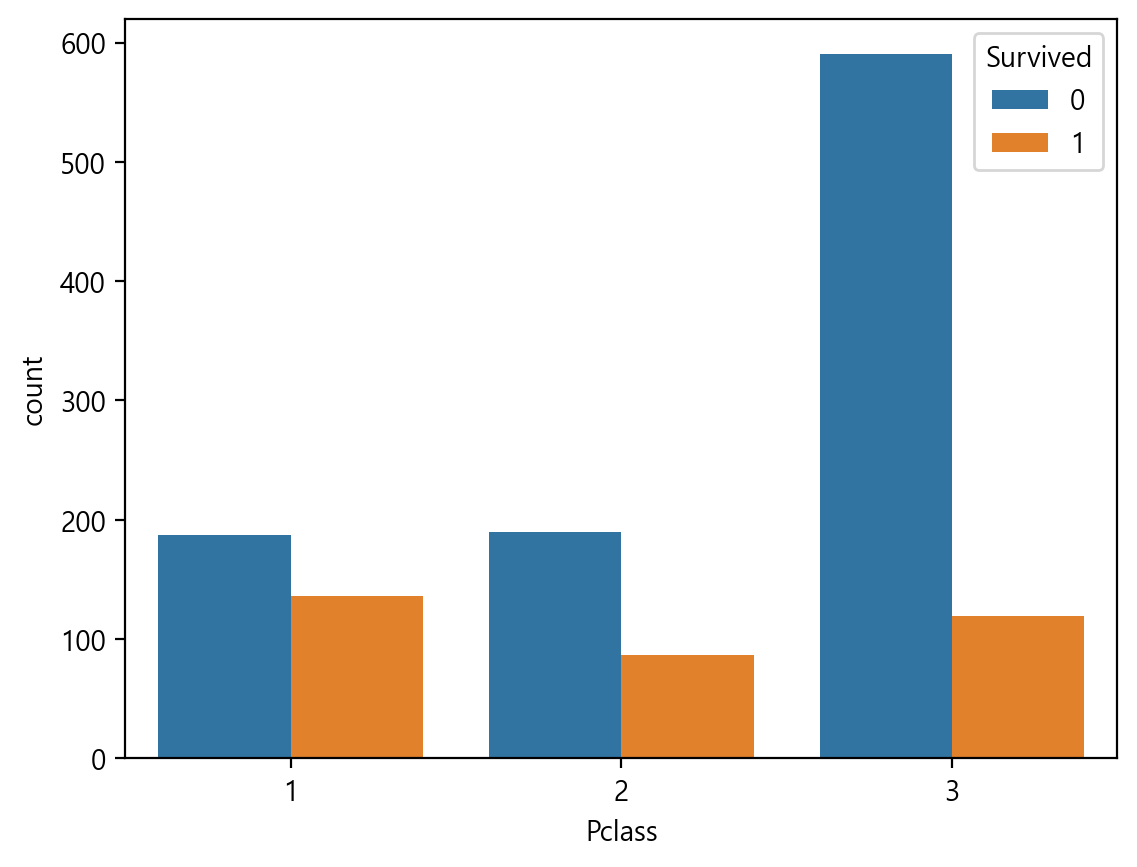

In [53]:
# 1.Pclass 별로 생존여부 확인
# 1등급 탑승자가 사망자에 비해 생존자의 비율이 가장 높다. >> 1등급에 탑승할수록 생존할 확률이 높았다.
sns.countplot(x="Pclass",hue="Survived",data=df)

<Axes: xlabel='Sex', ylabel='count'>

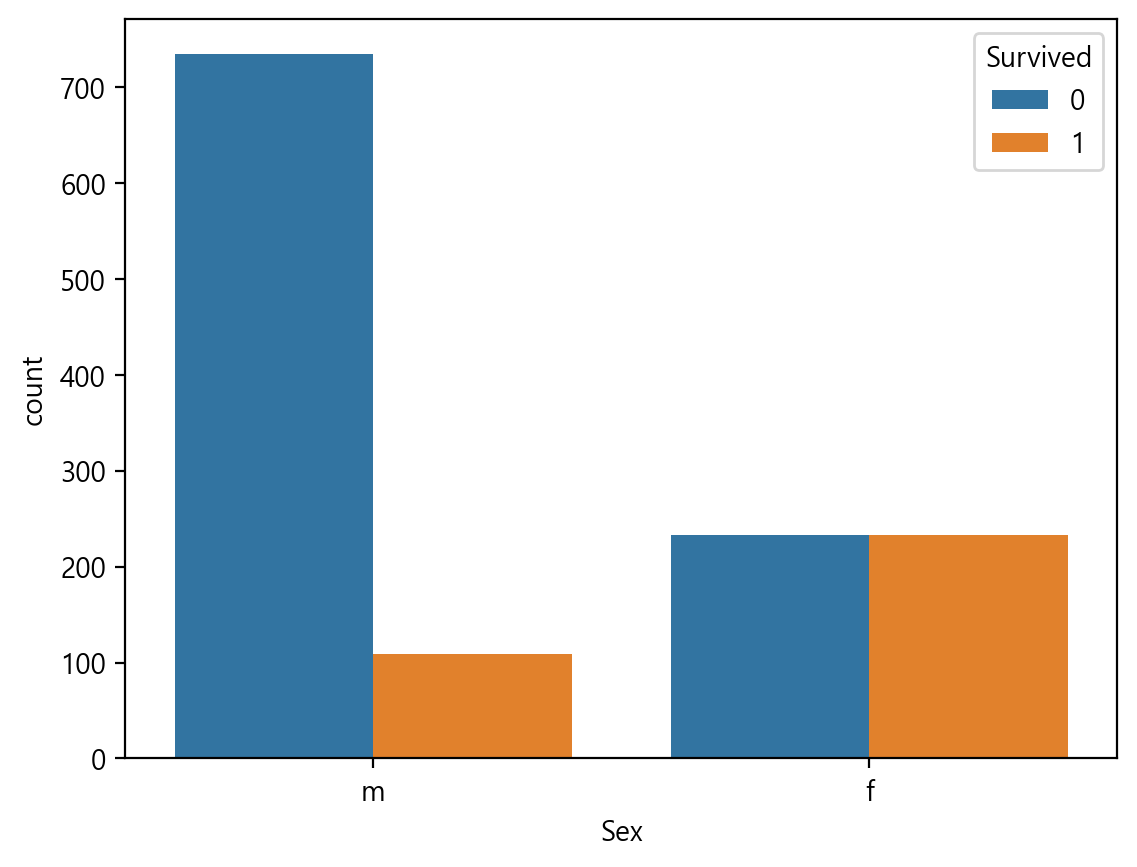

In [58]:
# 2.성별과 생존여부
# 남성에 비해 여성의 생존 확률이 높았다.
sns.countplot(x="Sex",hue="Survived",data=df)

<Axes: xlabel='Embarked', ylabel='count'>

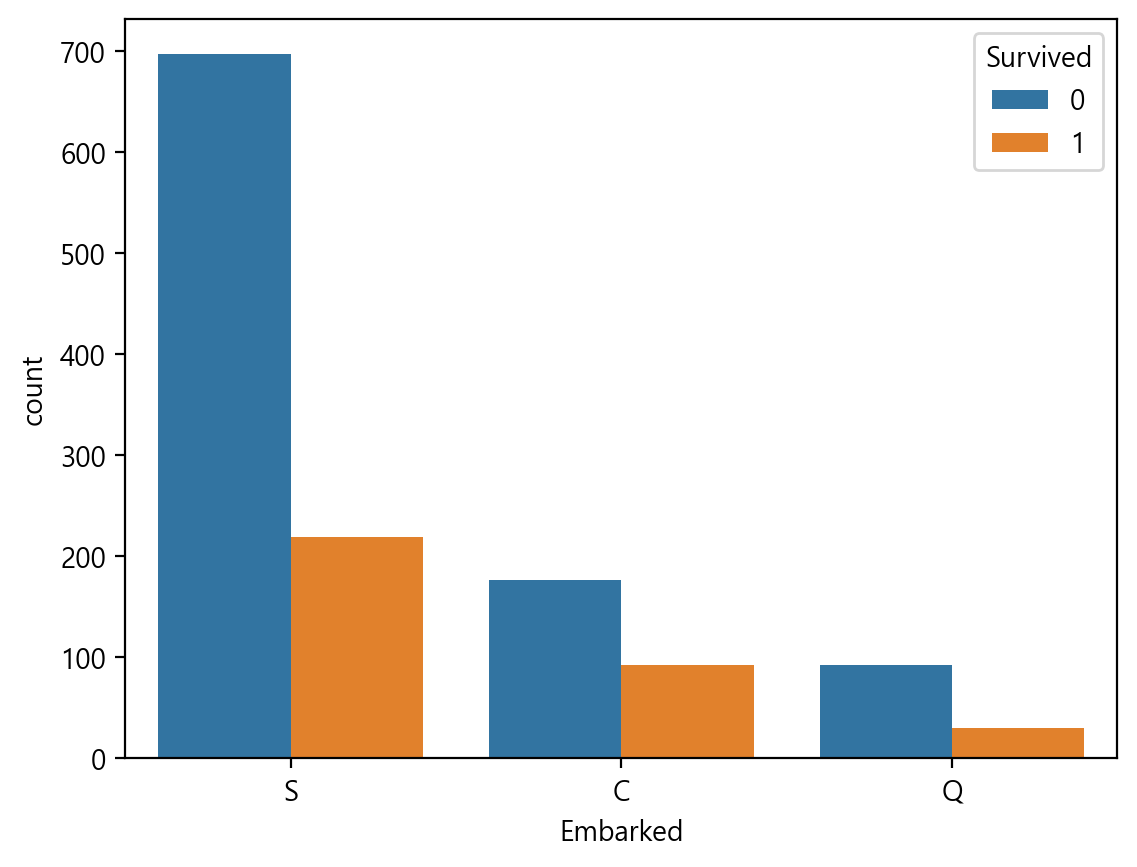

In [60]:
# 3.항구별로 생존여부
# 생존자는 S 항구가 가장높지만 생존자/사망자의 비율은 C항구가 제일 높은것으로 보아 생존확률은 C항구가 가장 높다
sns.countplot(x="Embarked",hue="Survived",data=df)

In [49]:
es = pd.crosstab(df["Embarked"],df["Survived"],normalize=True)*100
es["생존률"] = ( es[1] / es[0] ) * 100
es

Survived,0,1,생존률
Embarked,,,
C,13.521772,7.104660,52.542373
Q,7.104660,2.291826,32.258065
S,53.246753,16.730328,31.420373


<Axes: xlabel='Age', ylabel='Count'>

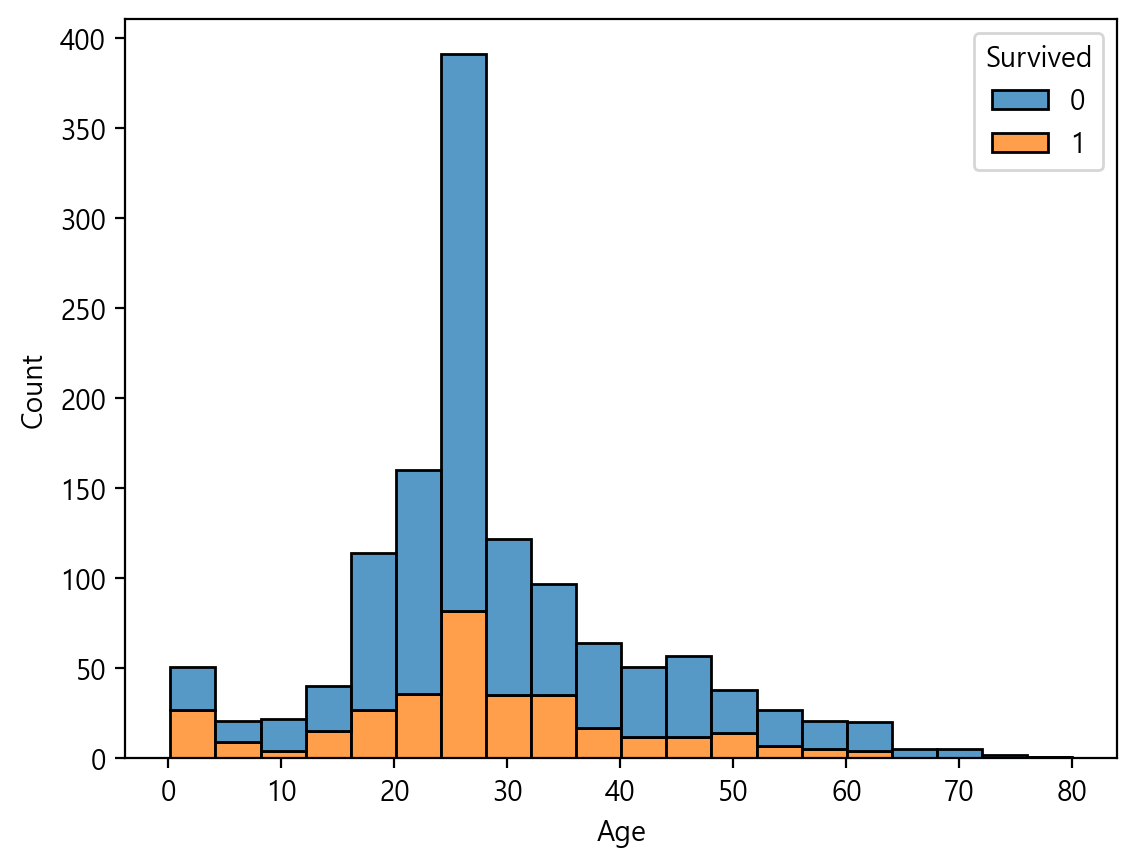

In [63]:
# 4.나이별로 생존여부
sns.histplot(x="Age",hue="Survived",data=df,bins=20,multiple="stack")

<Axes: xlabel='Age', ylabel='Fare'>

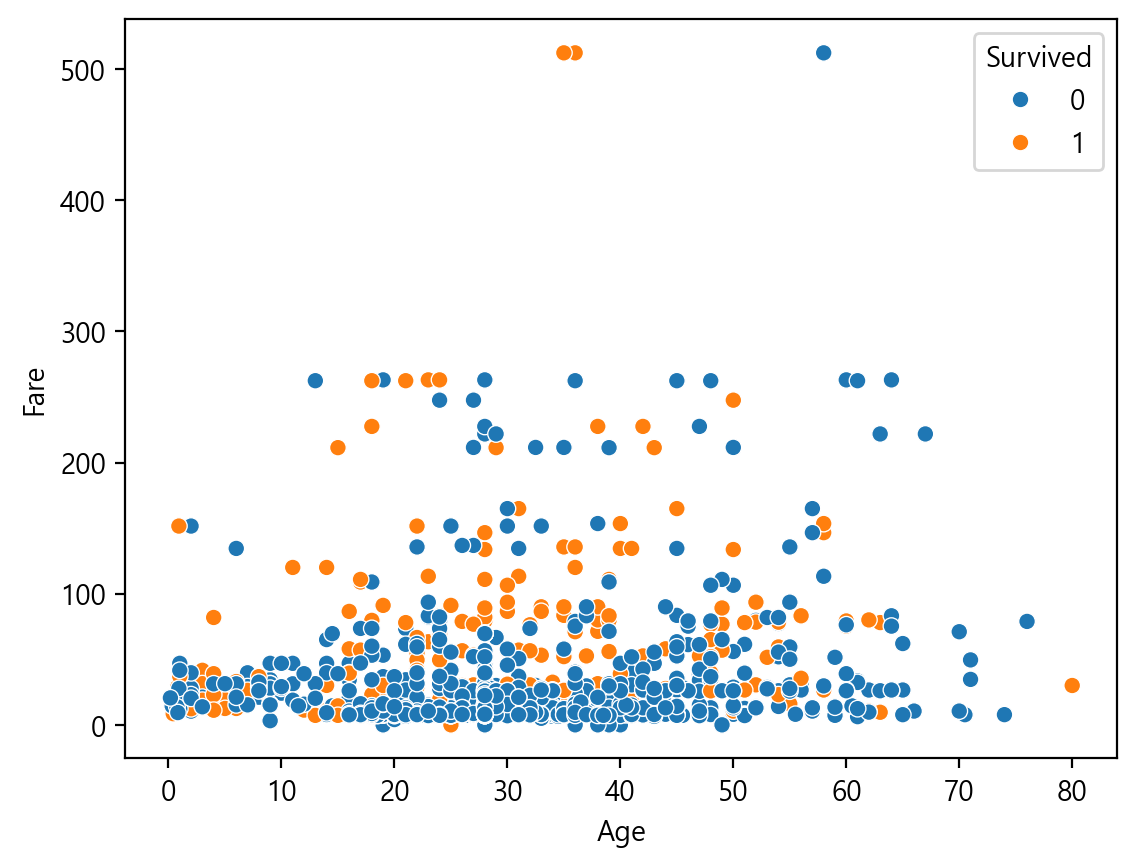

In [64]:
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=df)

In [65]:
# crosstab은 빈도표 , normalize ,100 추가하면 생존률까지 볼 수 있음 
# crosstab(행,열)
pd.crosstab(df["Pclass"], df["Survived"], normalize="index") * 100

Survived,0,1
Pclass,,
1,57.894737,42.105263
2,68.592058,31.407942
3,83.215797,16.784203


가족수에 따른 분석

In [8]:
df["Family"] = df["sibsp"]+df["Parch"]
df.head()

,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Family
0,1,22.0,7.2500,m,1,0,3,S,0,1
1,2,38.0,71.2833,f,1,0,1,C,1,1
2,3,26.0,7.9250,f,0,0,3,S,1,0
3,4,35.0,53.1000,f,1,0,1,S,1,1
4,5,35.0,8.0500,m,0,0,3,S,0,0


In [9]:
df_alone = df.loc[df['Family']==0]
df_alone.head()

,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Family
2,3,26.0,7.9250,f,0,0,3,S,1,0
4,5,35.0,8.0500,m,0,0,3,S,0,0
5,6,28.0,8.4583,m,0,0,3,Q,0,0
6,7,54.0,51.8625,m,0,0,1,S,0,0
11,12,58.0,26.5500,f,0,0,1,S,1,0


<Axes: xlabel='Survived', ylabel='count'>

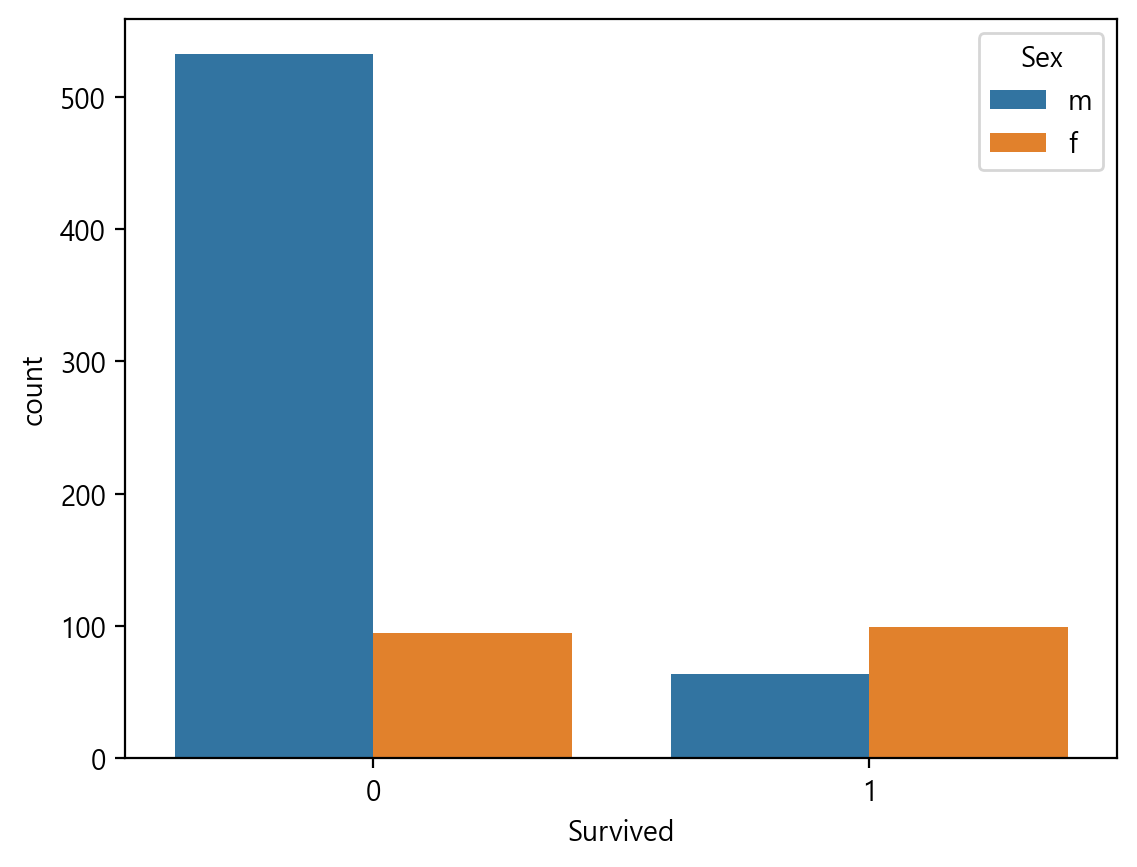

In [10]:
sns.countplot(x='Survived',hue='Sex',data = df_alone)

In [11]:
df_notalone = df.loc[df['Family']>0]
df_notalone.head()

,PassengerId,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Family
0,1,22.0,7.2500,m,1,0,3,S,0,1
1,2,38.0,71.2833,f,1,0,1,C,1,1
3,4,35.0,53.1000,f,1,0,1,S,1,1
7,8,2.0,21.0750,m,3,1,3,S,0,4
8,9,27.0,11.1333,f,0,2,3,S,1,2


<Axes: xlabel='Family', ylabel='count'>

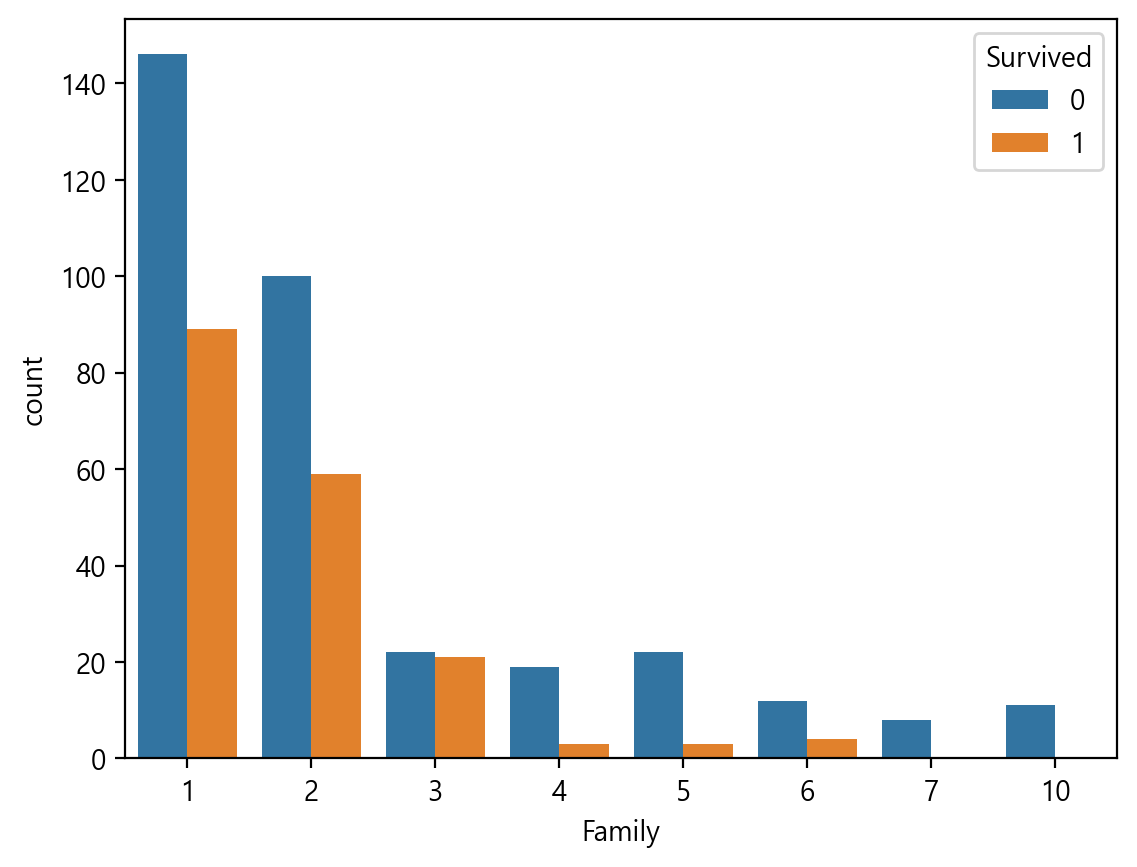

In [12]:
sns.countplot(x='Family',hue='Survived',data=df_notalone)

In [13]:
survive = pd.crosstab(df["Family"],df["Survived"],normalize=True)*100
survive["생존률"] = (survive[1] / survive[0]) *100
survive

Survived,0,1,생존률
Family,,,
0,47.899160,12.452254,25.996810
1,11.153552,6.799083,60.958904
2,7.639419,4.507257,59.000000
3,1.680672,1.604278,95.454545
4,1.451490,0.229183,15.789474
5,1.680672,0.229183,13.636364
6,0.916730,0.305577,33.333333
7,0.611154,0.000000,0.000000
10,0.840336,0.000000,0.000000


3명의 가족들끼리 왔을 때 생존률이 가장 높으며 7,10명은 모두 다 사망한걸 확인할수있다.

### 생존확률 예측하기

In [27]:
import numpy as np
df_num =df[['PassengerId', 'Age', 'Fare', 'sibsp', 'Parch', 'Pclass',
        'Survived', 'Family','Sex']].copy()
df_num["Sex"] = np.where(df_num["Sex"] == "m", 0, 1)

df_num.corr()["Survived"].sort_values()

PassengerId   -0.331493
Pclass        -0.244686
Age           -0.055862
sibsp         -0.014375
Family         0.020555
Parch          0.054908
Fare           0.173786
Sex            0.404020
Survived       1.000000
Name: Survived, dtype: float64

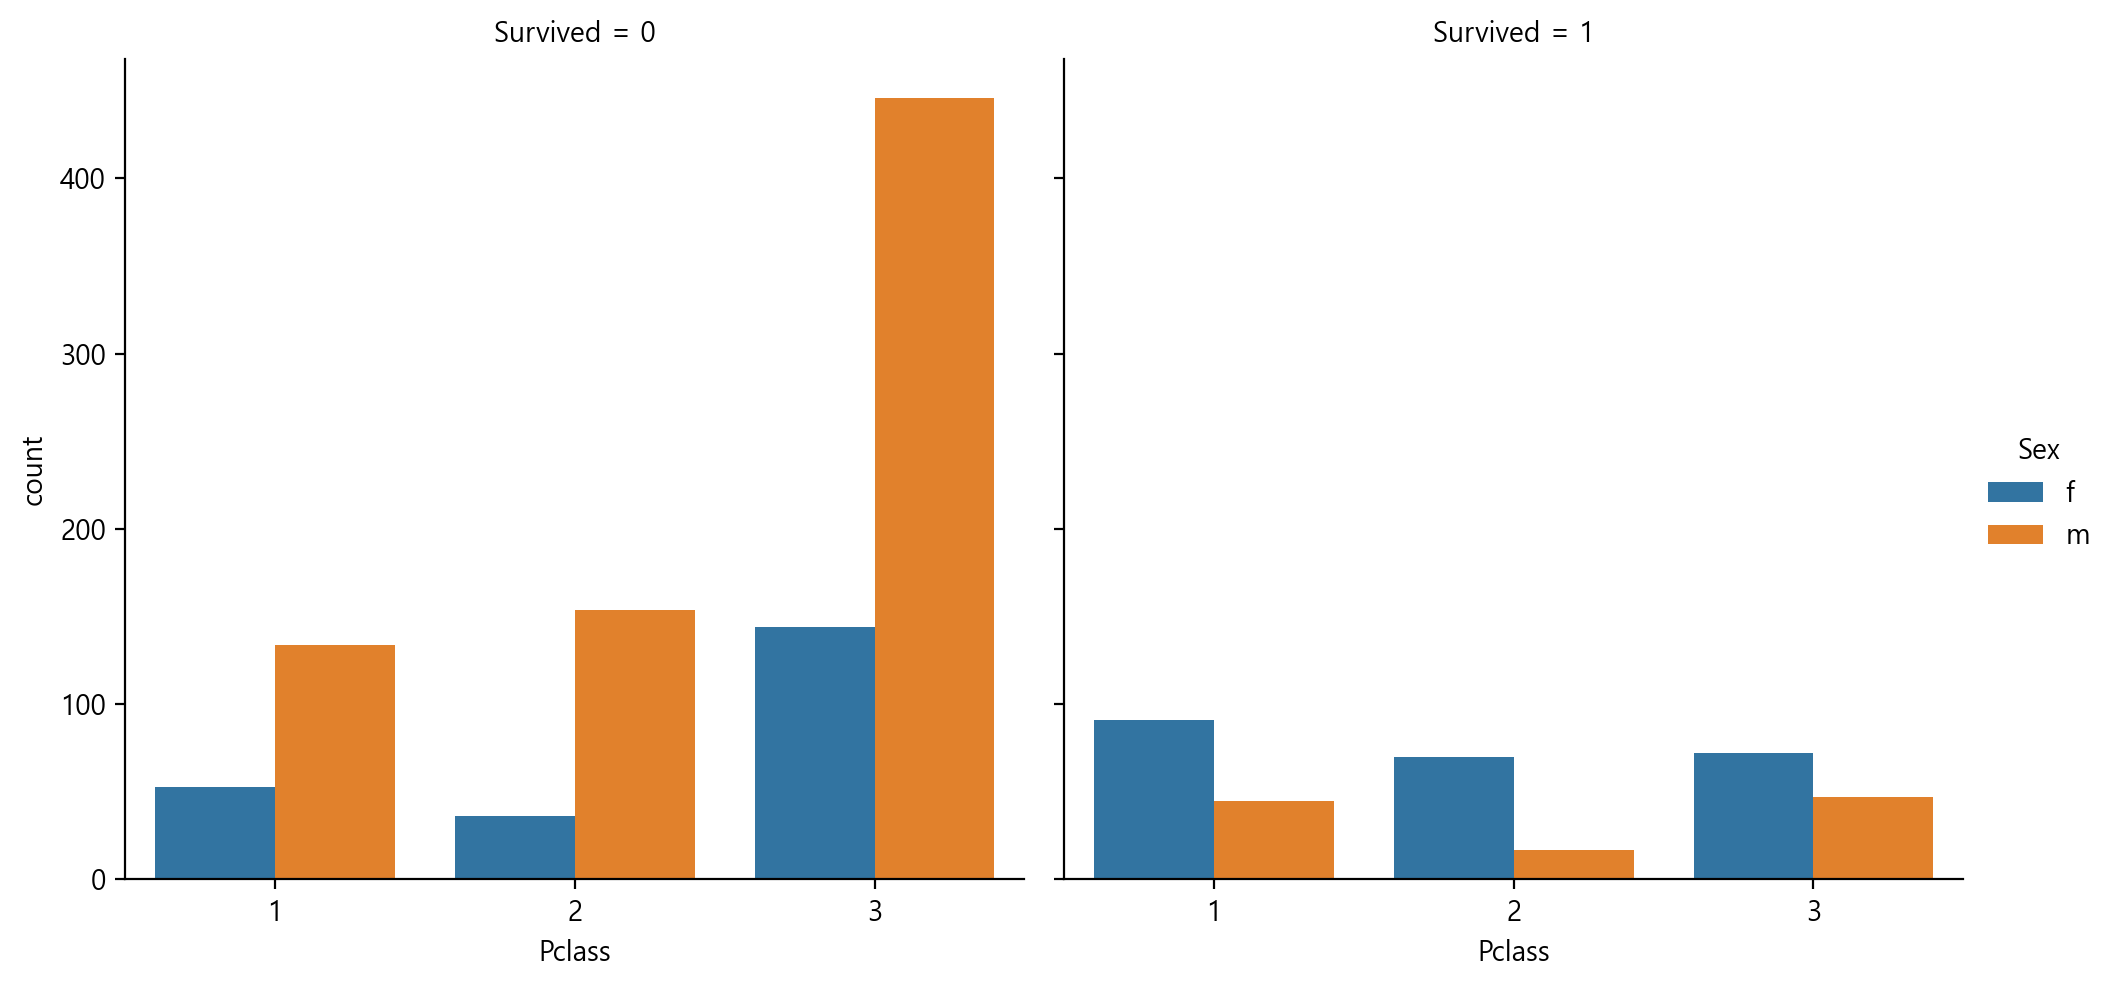

In [36]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", 
            data=df, kind="count")

<Axes: xlabel='Survived', ylabel='Age'>

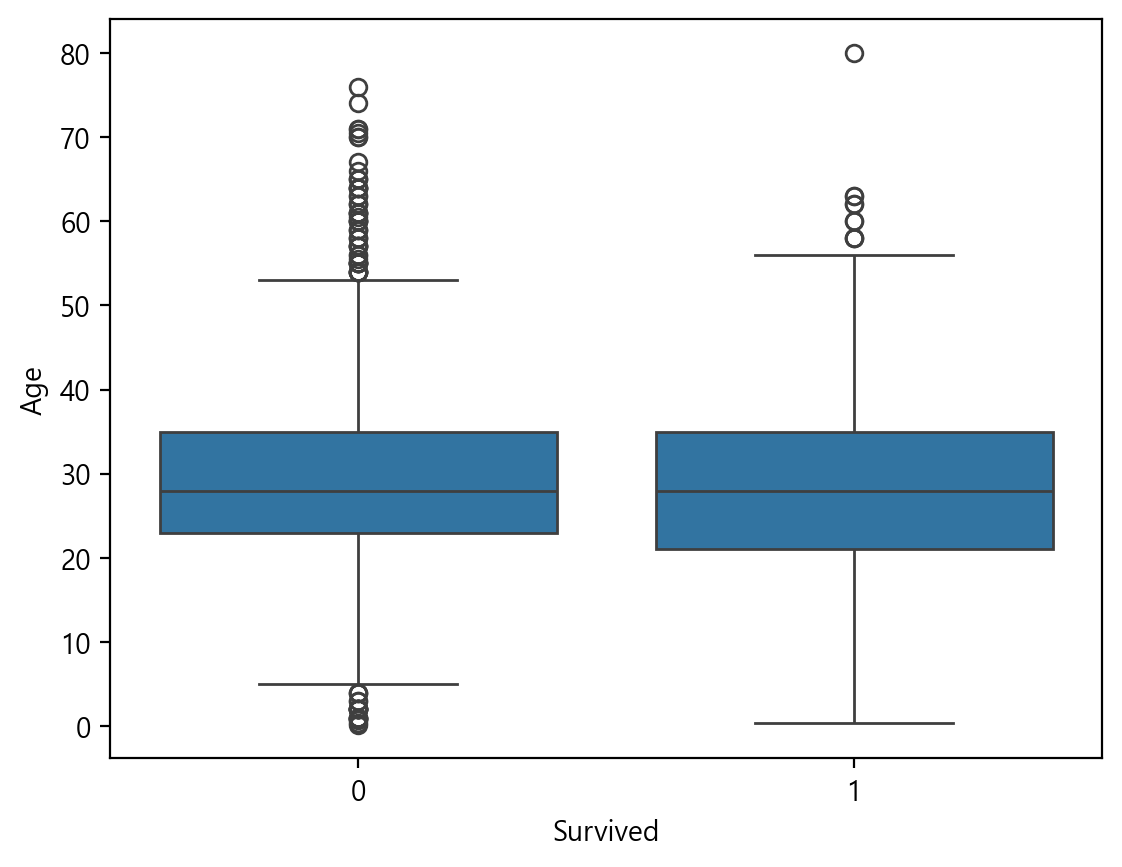

In [37]:
sns.boxplot(x="Survived", y="Age", data=df)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
features = ["Pclass", "Sex", "Age", "Fare", "Family"]
X = df[features]
y = df["Survived"]

# 범주형 변수 처리 (Sex → 숫자 더미변수)
X = pd.get_dummies(X, drop_first=True)

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)  #max_iter = “최적화 반복 최대 횟수”

# 학습
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = log_reg.predict(X_test)

# 정확도
print("Accuracy:", accuracy_score(y_test, y_pred))

# 혼동 행렬
print(confusion_matrix(y_test, y_pred))

# 정밀도, 재현율, f1-score
print(classification_report(y_test, y_pred))

Accuracy: 0.7633587786259542
[[175  14]
 [ 48  25]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       189
           1       0.64      0.34      0.45        73

    accuracy                           0.76       262
   macro avg       0.71      0.63      0.65       262
weighted avg       0.74      0.76      0.74       262



결과를 보니 정확도는 76%이다. 
혼동행렬을 보니 0 (사망)인 사람들 중 175명은 예측성공하였고 14명은 틀렸다. 또한 1 (생존) 인 사람들 중 48명은 틀렸고 25명은 맞췄다
혼동행렬 해석을 보아 사망보다 생존을 잘 예측하지 못하는 경향이 있다. 이것은 생존데이터의 부족 영향도 있다.